In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import tree

# Uitlizando um dataset real e avaliar o modelo e encontrar o melhor parametro
## Esse projeto consiste em treinar para o entendimento do modelo 

In [4]:
# importar o dataset

df = pd.read_csv('kc_house_data.csv')
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.shape

(21613, 21)

In [6]:
# variaveis preditoras:
# nesse caso vou excluir as colunas PRICE/DATE/ID pois não vais er usada
x = df.drop(['price','date', 'id'], axis = 1)



In [7]:
# variavel target/ alvo
y = df['price'].copy()

## infos: 
A função train_test_split é usada para dividir seus dados em dois conjuntos:

Conjunto de Treino: Usado para treinar o modelo.
Conjunto de Teste: Usado para avaliar o modelo.

O parâmetro test_size define a proporção dos dados que será usada para o conjunto de teste.
O parâmetro random_state controla a aleatoriedade da divisão dos dados.

In [ ]:
#dividindo os dados em treino e teste
# 30% será usado para teste e 70% usado para treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state = 42)

In [11]:
# parametro com a quantidade de nós da arvore
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [12]:
# criando as listas vazias que irao receber o percentual de erro de cada treinoe cada teste
lista_erro_treino = []
lista_erro_teste = []

In [ ]:
# loop for para fazer a iteraçao do treinamento e validaçao do modelo
for i in max_depth: #for vai pasar por cada max_depth
    modelo = tree.DecisionTreeRegressor(max_depth=i) # nesse caso ele vai percorrer 1 por 1 até chegar em 20
    modelo.fit(x_treino, y_treino)
    
    predicoes_treino = modelo.predict(x_treino)
    mea_treino =  mean_absolute_percentage_error(y_treino, predicoes_treino)
    lista_erro_treino.append(mea_treino)
    
    predicoes_teste = modelo.predict(x_teste)
    mea_teste = mean_absolute_percentage_error(y_teste, predicoes_teste)
    lista_erro_teste.append(mea_teste)
    
    # nao esquecer : x entrada e y saida
    

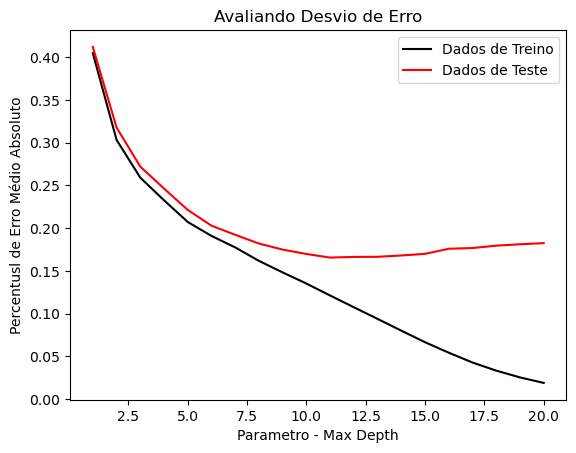

In [ ]:
# gerando o grafico
plt.plot(max_depth, lista_erro_treino, color='black', label="Dados de Treino")
plt.plot(max_depth, lista_erro_teste, color='red', label="Dados de Teste" )
plt.title("Avaliando Desvio de Erro")
plt.legend(loc="upper right")
plt.xlabel("Parametro - Max Depth")
plt.ylabel("Percentusl de Erro Médio Absoluto")
plt.show()

# resumindi: a linha de treino só esta treinando ou seja memorizar e ai esta gerando overfit

In [15]:
# criando o modelo após identificar o melhor parametro que no caso é 7
modelo = tree.DecisionTreeRegressor(max_depth=7)


In [16]:
# agora vai ser treinado co modelo com o parametro adequado
modelo.fit(x_treino,y_treino)

DecisionTreeRegressor(max_depth=7)

In [17]:
#gerar a predicao de dados de teste
precisoes_teste = modelo.predict(x_teste)

In [ ]:
#verificando o percentural de erro do modelo
print("MAPE (Percentual Médio Erro Modelo):", mean_absolute_percentage_error(y_teste, predicoes_teste) *100 )

# 18% de erro

MAPE (Percentual Médio Erro Modelo): 18.24137586059918


### nesse caso poderiamos melhor o percentual de erro com tratamento de dados.